In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, cauchy, laplace, gaussian_kde
from scipy.optimize import minimize
from scipy.special import erf
from statsmodels.distributions.empirical_distribution import ECDF
import scipy.stats as stats
import pandas as pd

In [36]:
A_values = [1, 10]
N_values = [1, 10, 100, 1000, 10000]
n_trials = 10000
results = {}

for A in A_values:
    results[A] = {}
    print(f"\nResults for true A = {A}:")

    for N in N_values:
        A_hat_list = []
        for _ in range(n_trials):
            noise = np.random.randn(N)
            samples = A + noise
            A_hat = samples.mean()
            A_hat_list.append(A_hat)

        A_hat_array = np.array(A_hat_list)
        emp_mean = A_hat_array.mean()
        emp_var = A_hat_array.var()
        results[A][N] = {'mean': emp_mean, 'var': emp_var, 'A_hat': A_hat_array}
        print(f"  N = {N:5d} | Empirical Mean: {emp_mean:.4f} | Empirical Variance: {emp_var:.8f}")


Results for true A = 1:
  N =     1 | Empirical Mean: 0.9895 | Empirical Variance: 1.01172211
  N =    10 | Empirical Mean: 1.0028 | Empirical Variance: 0.09769087
  N =   100 | Empirical Mean: 1.0005 | Empirical Variance: 0.01016403
  N =  1000 | Empirical Mean: 0.9998 | Empirical Variance: 0.00099780
  N = 10000 | Empirical Mean: 1.0000 | Empirical Variance: 0.00009919

Results for true A = 10:
  N =     1 | Empirical Mean: 9.9967 | Empirical Variance: 0.99754896
  N =    10 | Empirical Mean: 10.0033 | Empirical Variance: 0.09961837
  N =   100 | Empirical Mean: 10.0002 | Empirical Variance: 0.01000796
  N =  1000 | Empirical Mean: 10.0003 | Empirical Variance: 0.00102985
  N = 10000 | Empirical Mean: 9.9999 | Empirical Variance: 0.00009983


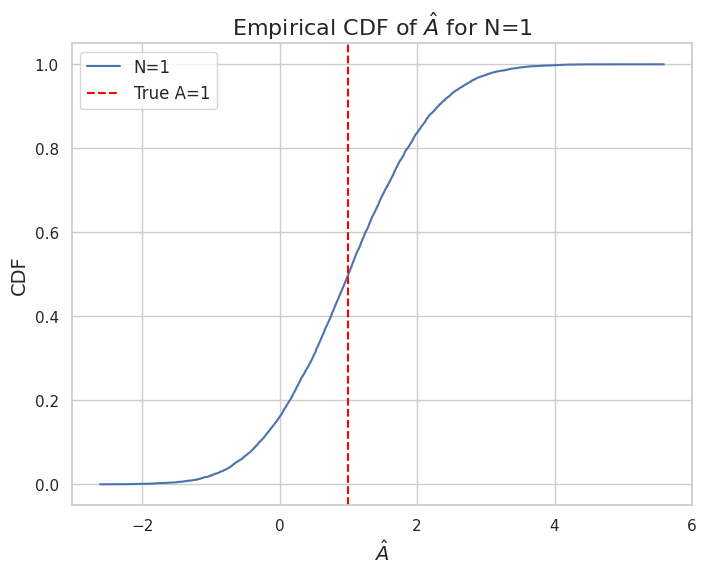

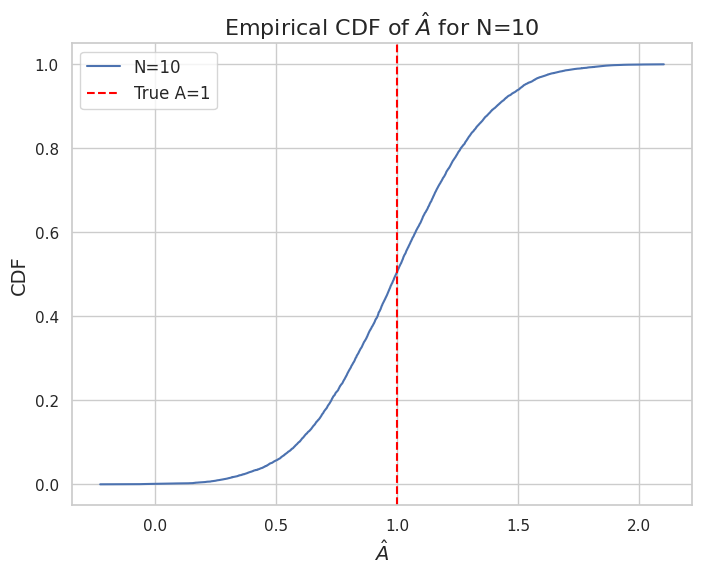

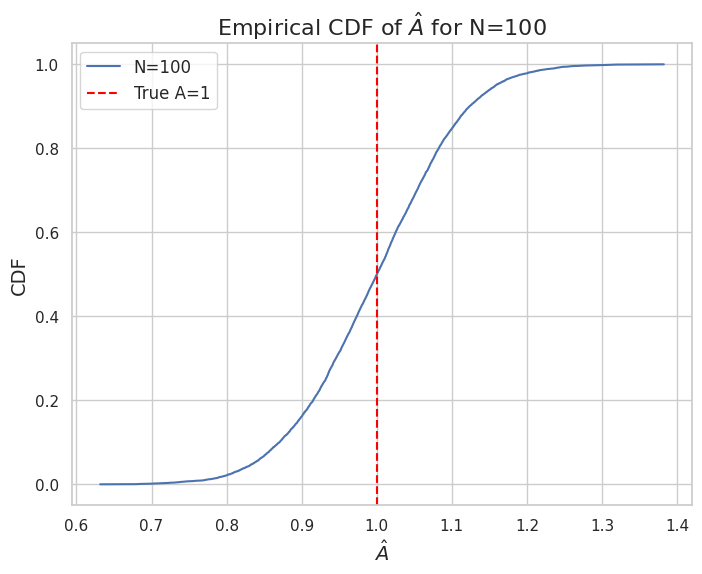

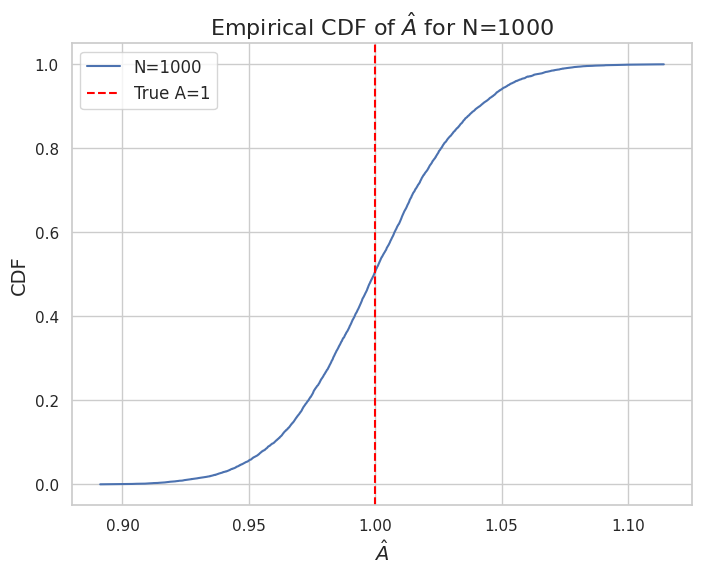

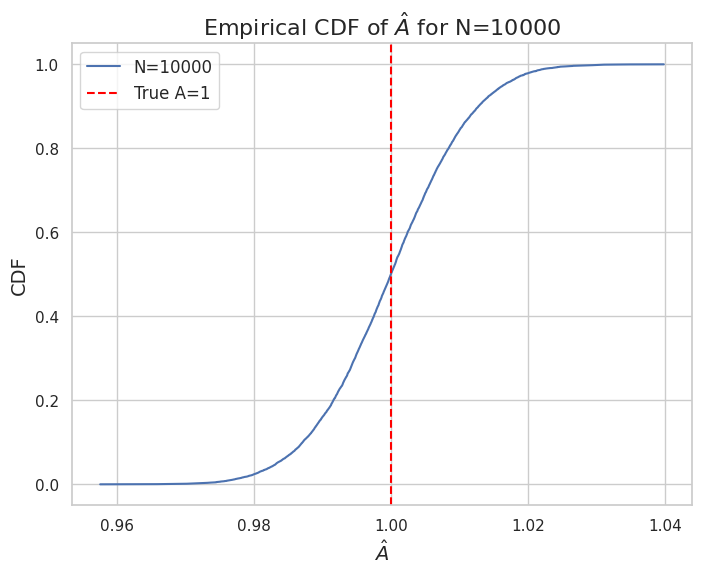

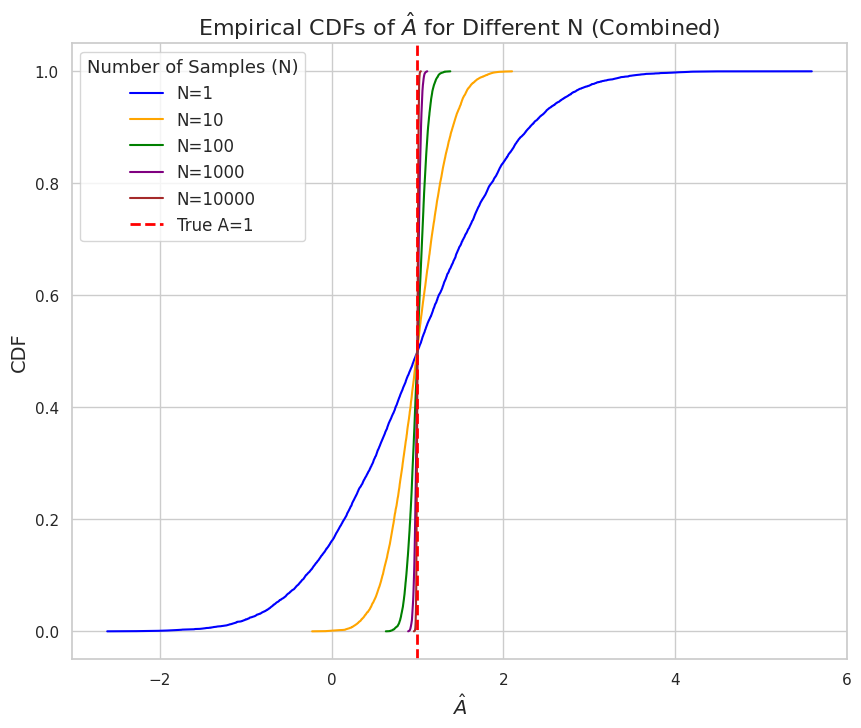

In [32]:
true_A = 1
N_values = [1, 10, 100, 1000, 10000]
n_trials = 10000
results = {}

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

for N in N_values:
    A_hat_list = []
    for _ in range(n_trials):
        noise = np.random.randn(N)
        samples = true_A + noise
        A_hat = samples.mean()
        A_hat_list.append(A_hat)
    results[N] = np.array(A_hat_list)

for N in N_values:
    A_hat = results[N]
    sorted_Ahat = np.sort(A_hat)
    cdf = np.linspace(0, 1, len(sorted_Ahat))

    plt.figure(figsize=(8, 6))
    plt.plot(sorted_Ahat, cdf, label=f'N={N}')
    plt.axvline(true_A, color='red', linestyle='--', label='True A=1')
    plt.xlabel(r'$\hat{A}$', fontsize=14)
    plt.ylabel('CDF', fontsize=14)
    plt.title(f'Empirical CDF of $\hat{{A}}$ for N={N}', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

plt.figure(figsize=(10, 8))

colors = ['blue', 'orange', 'green', 'purple', 'brown']  # different colors for clarity

for idx, N in enumerate(N_values):
    A_hat = results[N]
    sorted_Ahat = np.sort(A_hat)
    cdf = np.linspace(0, 1, len(sorted_Ahat))
    plt.plot(sorted_Ahat, cdf, label=f'N={N}', color=colors[idx])

plt.axvline(true_A, color='red', linestyle='--', label='True A=1', linewidth=2)
plt.xlabel(r'$\hat{A}$', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Empirical CDFs of $\hat{A}$ for Different N (Combined)', fontsize=16)
plt.legend(title='Number of Samples (N)', fontsize=12, title_fontsize=13)
plt.grid(True)
plt.show()

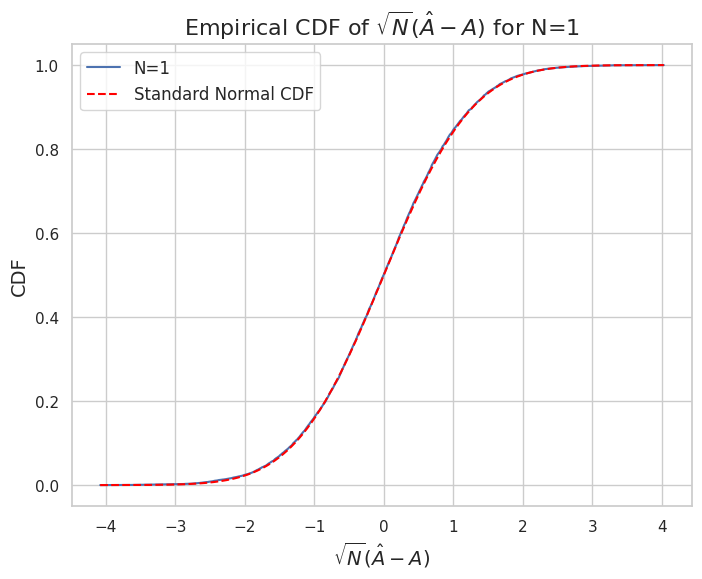

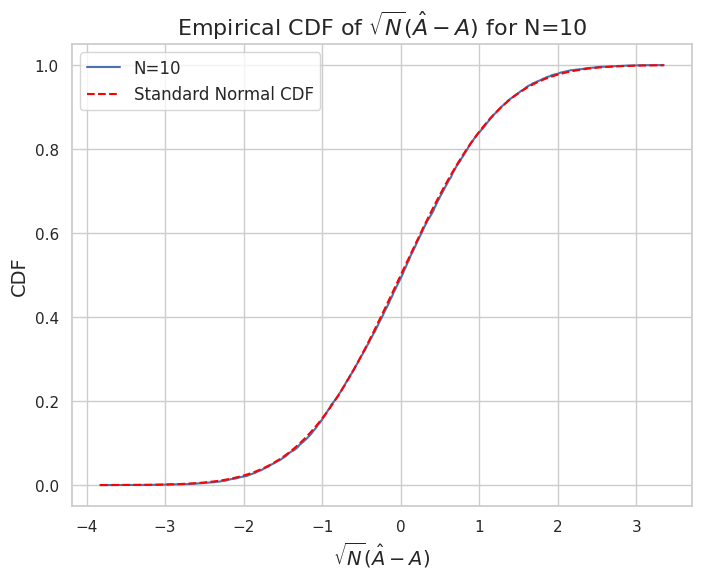

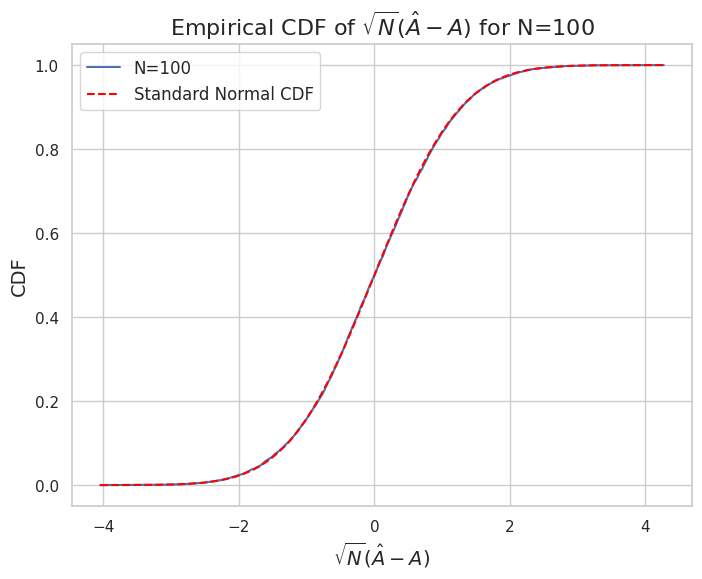

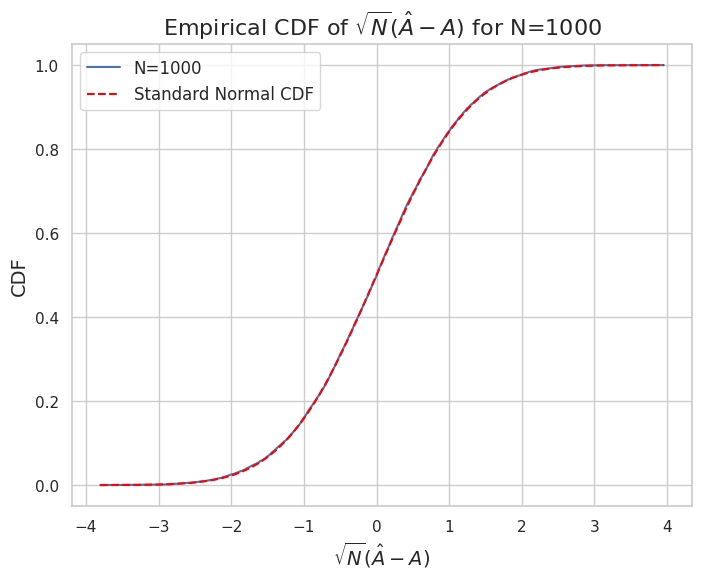

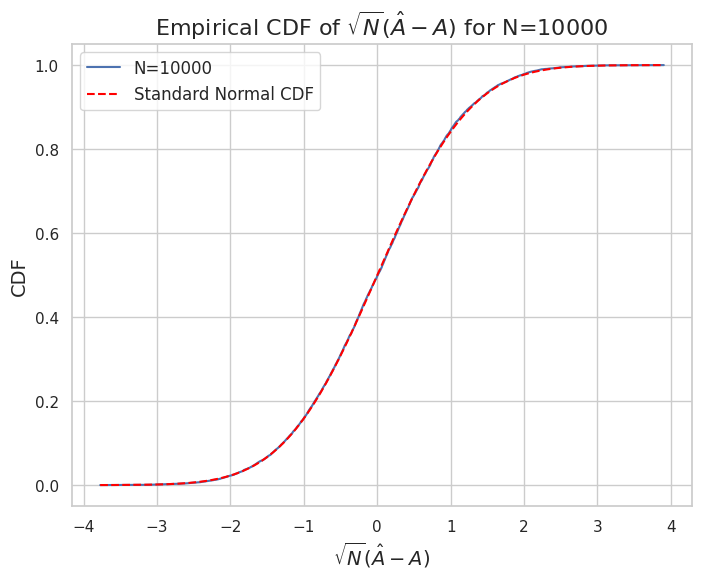

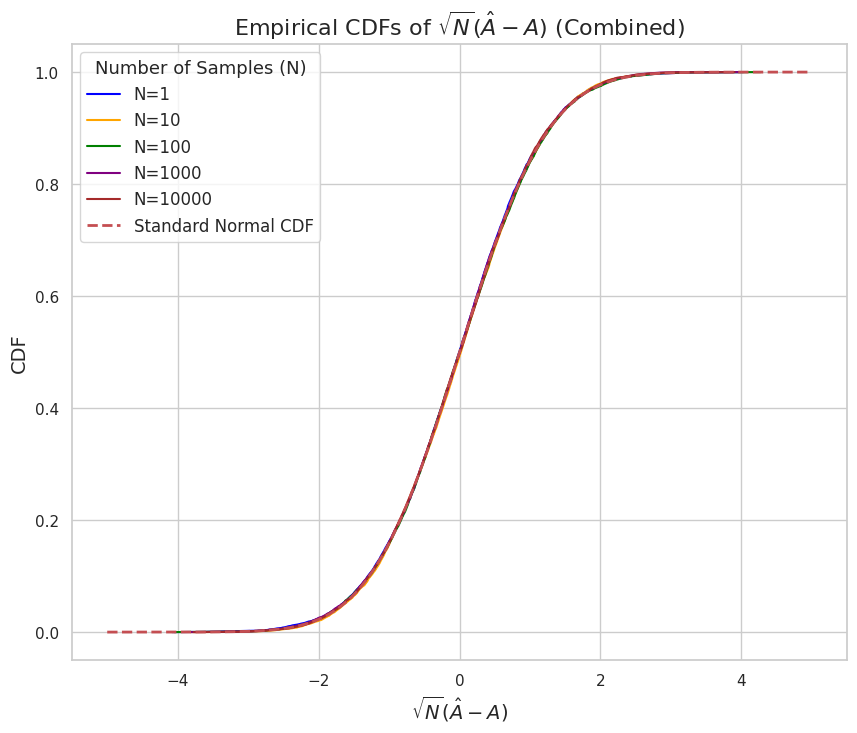

In [41]:
true_A = 1
N_values = [1, 10, 100, 1000, 10000]

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

results_scaled = {}

for N in N_values:
    A_hat_array = results[true_A][N]['A_hat']
    Z_N = np.sqrt(N) * (A_hat_array - true_A)
    results_scaled[N] = Z_N

for N in N_values:
    Z_N = results_scaled[N]
    sorted_Z = np.sort(Z_N)
    cdf = np.linspace(0, 1, len(sorted_Z))

    plt.figure(figsize=(8, 6))
    plt.plot(sorted_Z, cdf, label=f'N={N}')
    plt.plot(sorted_Z, 0.5 * (1 + erf(sorted_Z / np.sqrt(2))),
             linestyle='--', color='red', label='Standard Normal CDF')
    plt.xlabel(r'$\sqrt{N}(\hat{A} - A)$', fontsize=14)
    plt.ylabel('CDF', fontsize=14)
    plt.title(f'Empirical CDF of $\sqrt{{N}}(\hat{{A}}-A)$ for N={N}', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

plt.figure(figsize=(10, 8))
colors = ['blue', 'orange', 'green', 'purple', 'brown']

for idx, N in enumerate(N_values):
    Z_N = results_scaled[N]
    sorted_Z = np.sort(Z_N)
    cdf = np.linspace(0, 1, len(sorted_Z))
    plt.plot(sorted_Z, cdf, label=f'N={N}', color=colors[idx])

Z_line = np.linspace(-5, 5, 1000)
standard_normal_cdf = 0.5 * (1 + erf(Z_line / np.sqrt(2)))
plt.plot(Z_line, standard_normal_cdf, 'r--', label='Standard Normal CDF', linewidth=2)

plt.xlabel(r'$\sqrt{N}(\hat{A} - A)$', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.title('Empirical CDFs of $\sqrt{N}(\hat{A}-A)$ (Combined)', fontsize=16)
plt.legend(title='Number of Samples (N)', fontsize=12, title_fontsize=13)
plt.grid(True)
plt.show()

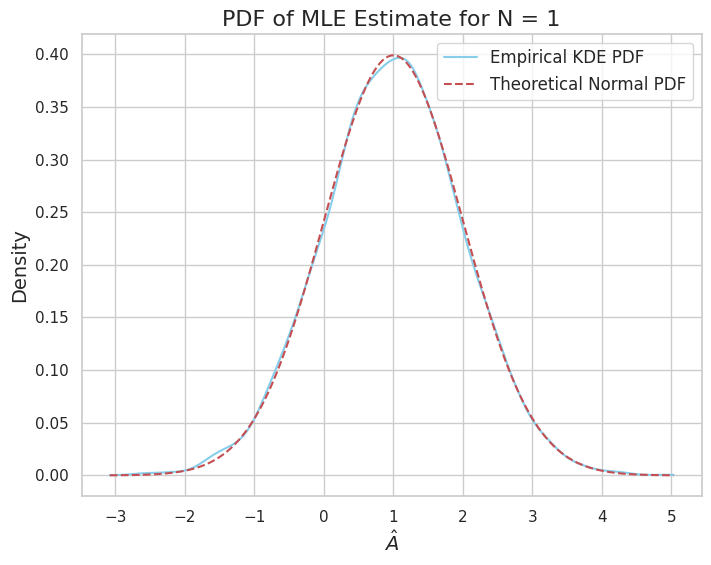

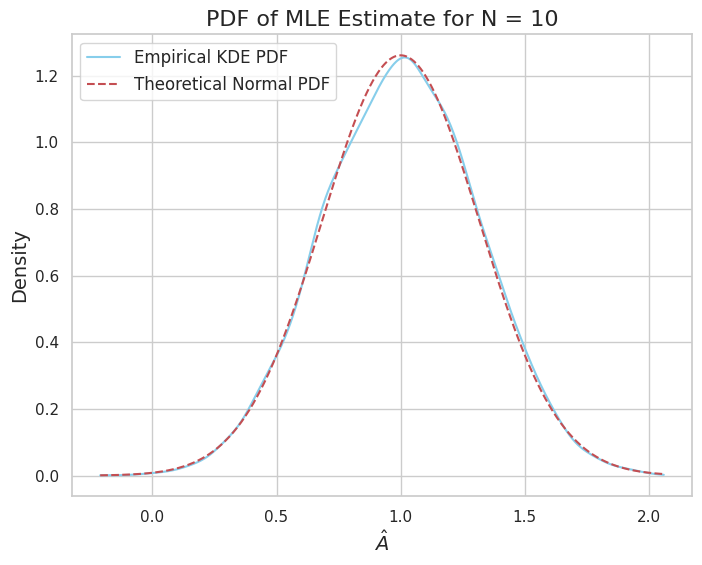

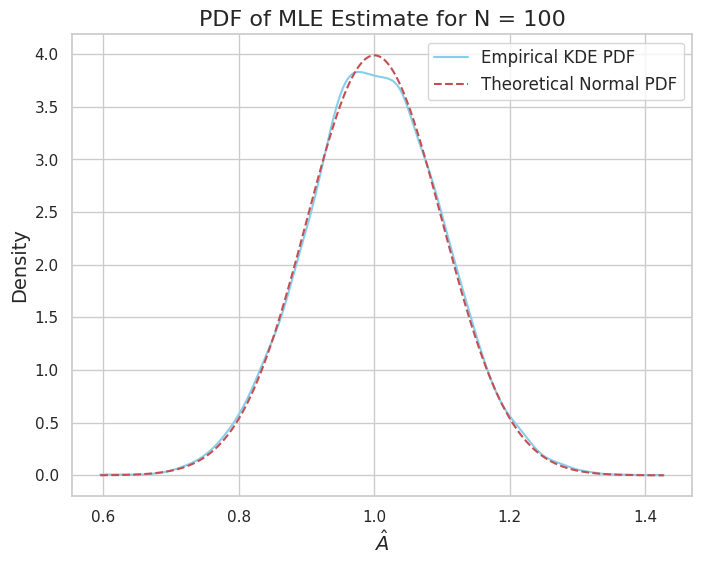

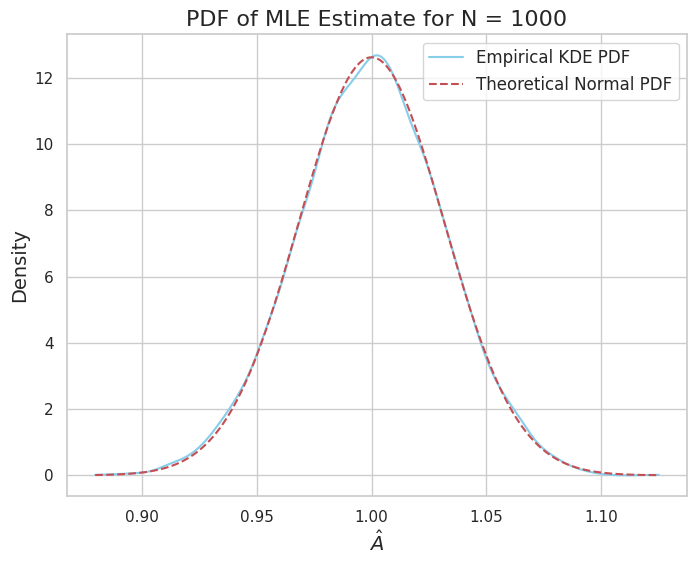

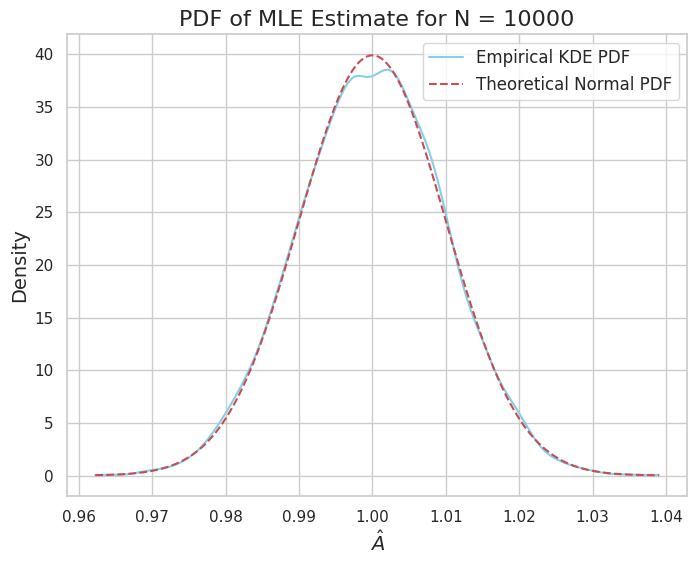

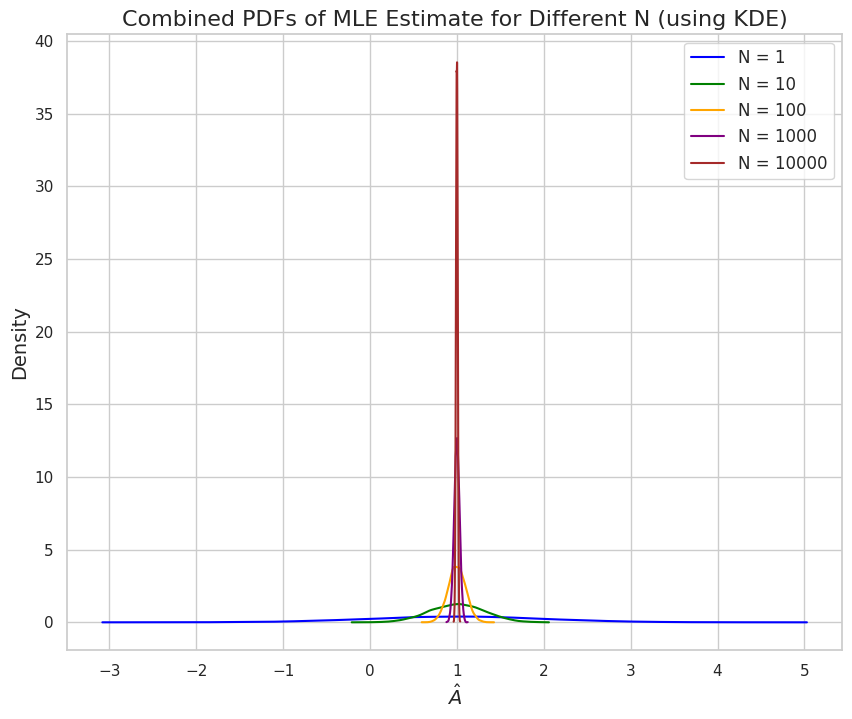

In [43]:
true_A = 1
N_values = [1, 10, 100, 1000, 10000]

for N in N_values:
    A_hat_array = results[true_A][N]['A_hat']

    kde = gaussian_kde(A_hat_array)
    x = np.linspace(A_hat_array.min(), A_hat_array.max(), 1000)
    kde_pdf = kde(x)

    plt.figure(figsize=(8,6))
    plt.plot(x, kde_pdf, color='skyblue', label='Empirical KDE PDF')

    theoretical_pdf = norm.pdf(x, loc=true_A, scale=1/np.sqrt(N))
    plt.plot(x, theoretical_pdf, 'r--', label='Theoretical Normal PDF')

    plt.xlabel(r'$\hat{A}$', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title(f'PDF of MLE Estimate for N = {N}', fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()


plt.figure(figsize=(10,8))

colors = ['blue', 'green', 'orange', 'purple', 'brown']

for idx, N in enumerate(N_values):
    A_hat_array = results[true_A][N]['A_hat']

    kde = gaussian_kde(A_hat_array)
    x = np.linspace(A_hat_array.min(), A_hat_array.max(), 1000)
    kde_pdf = kde(x)

    plt.plot(x, kde_pdf, color=colors[idx], label=f'N = {N}')

plt.xlabel(r'$\hat{A}$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Combined PDFs of MLE Estimate for Different N (using KDE)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [58]:
np.random.seed(42)
A_values = [1, 10]
N_values = [1, 10, 100, 1000, 10000]
num_realizations = 10000

results_laplace = []
laplace_samples = {}

for A in A_values:
    for N in N_values:
        A_hat_list = []
        samples_for_this_case = []

        for _ in range(num_realizations):
            noise = np.random.laplace(loc=0, scale=1/np.sqrt(2), size=N)
            x_sample = A + noise

            A_hat = np.median(x_sample)
            A_hat_list.append(A_hat)

            samples_for_this_case.append(x_sample)

        A_hat_array = np.array(A_hat_list)

        mean_A_hat = np.mean(A_hat_array)
        var_A_hat = np.var(A_hat_array)

        results_laplace.append([A, N, mean_A_hat, var_A_hat])

        laplace_samples[(A, N)] = A_hat_array

results_df = pd.DataFrame(results_laplace, columns=["True A", "N", "E[A_hat]", "Var(A_hat)"])

print("==== Results for Laplace Noise ====")
print('\n')
print(results_df.to_string(index=False))

==== Results for Laplace Noise ====


 True A     N  E[A_hat]  Var(A_hat)
      1     1  0.980320    0.978444
      1    10  0.999914    0.072151
      1   100  1.000819    0.005815
      1  1000  1.000068    0.000518
      1 10000  0.999919    0.000052
     10     1  9.977716    0.998203
     10    10 10.003650    0.071879
     10   100  9.999003    0.005725
     10  1000 10.000324    0.000520
     10 10000  9.999989    0.000052


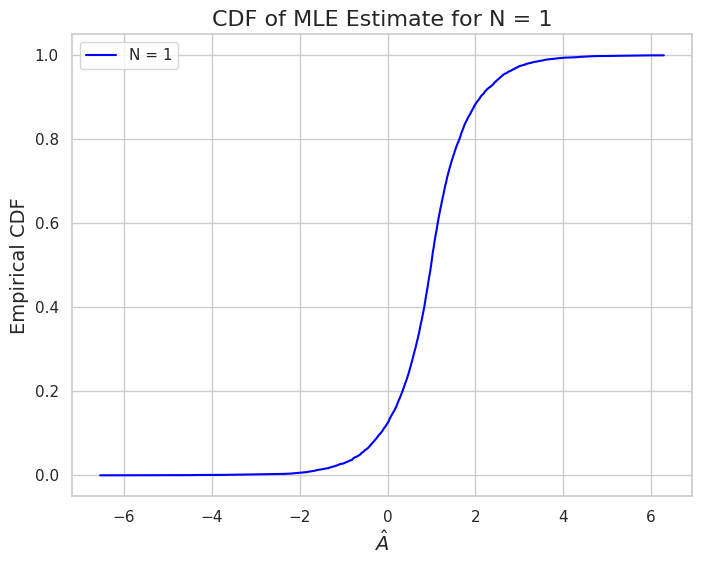

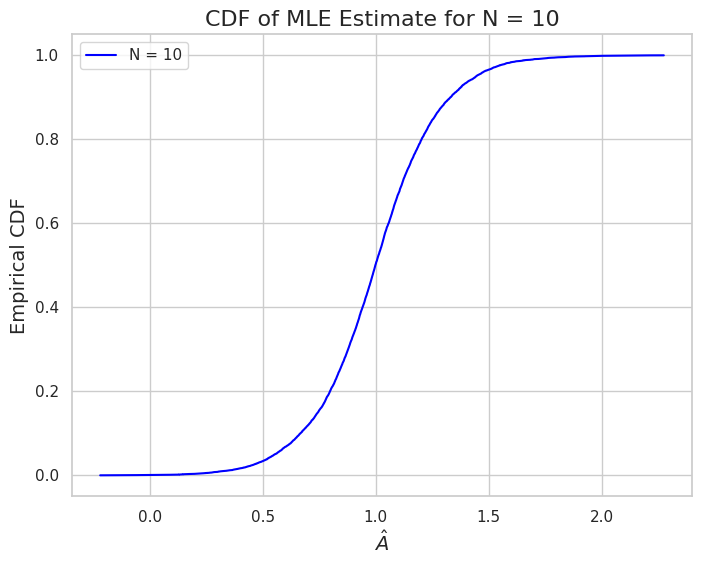

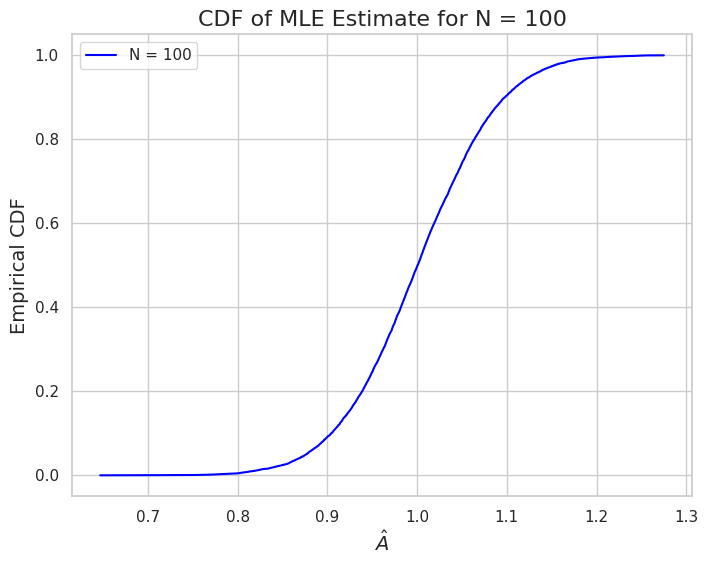

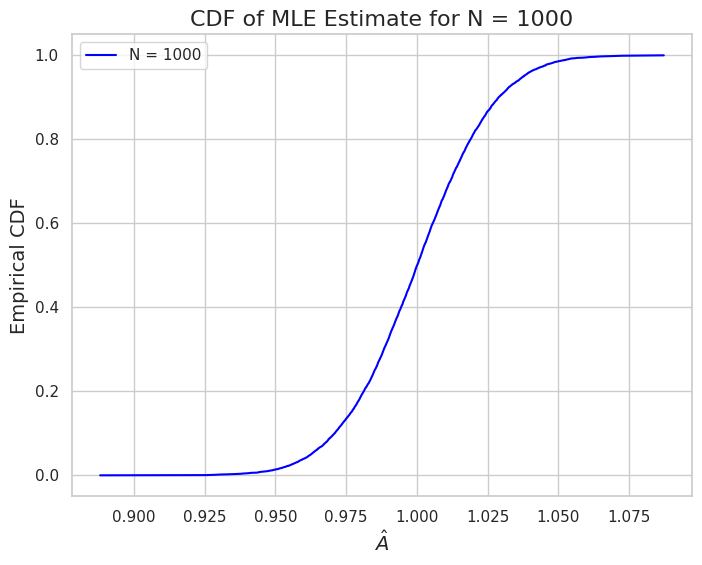

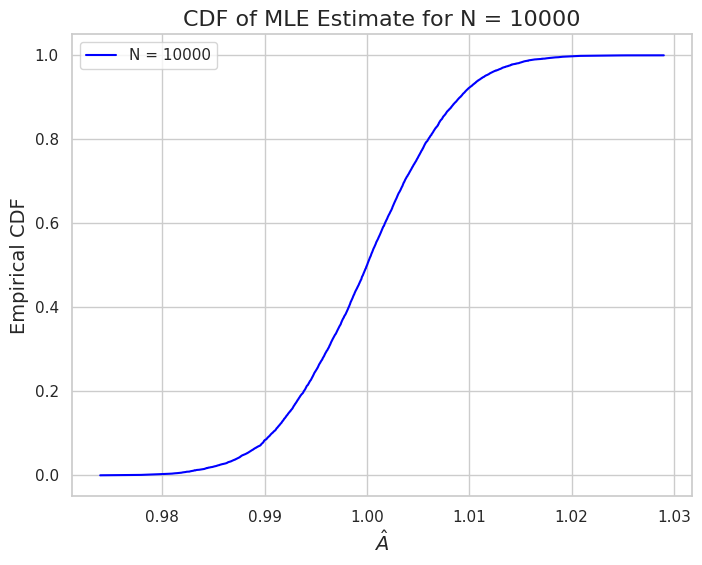

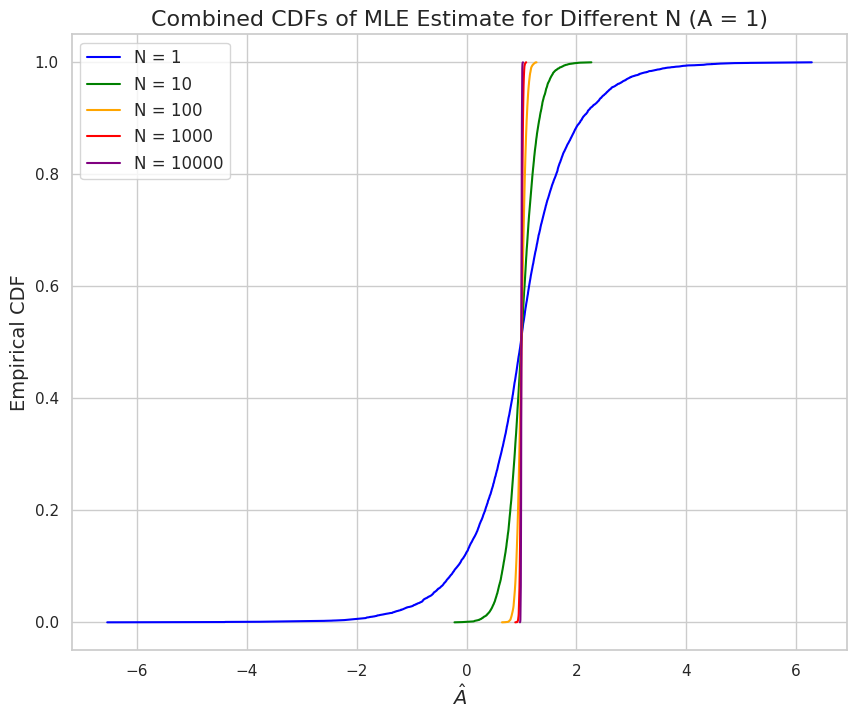

In [52]:
A_fixed = 1
N_values = [1, 10, 100, 1000, 10000]

for N in N_values:
    A_hat_array = laplace_samples[(A_fixed, N)]

    plt.figure(figsize=(8,6))

    sorted_estimates = np.sort(A_hat_array)
    empirical_cdf = np.arange(1, len(sorted_estimates)+1) / len(sorted_estimates)

    plt.plot(sorted_estimates, empirical_cdf, label=f'N = {N}', color='blue')

    plt.xlabel(r'$\hat{A}$', fontsize=14)
    plt.ylabel('Empirical CDF', fontsize=14)
    plt.title(f'CDF of MLE Estimate for N = {N}', fontsize=16)
    plt.grid(True)
    plt.legend()
    plt.show()


plt.figure(figsize=(10,8))

colors = ['blue', 'green', 'orange', 'red', 'purple']

for idx, N in enumerate(N_values):
    A_hat_array = laplace_samples[(A_fixed, N)]

    sorted_estimates = np.sort(A_hat_array)
    empirical_cdf = np.arange(1, len(sorted_estimates)+1) / len(sorted_estimates)

    plt.plot(sorted_estimates, empirical_cdf, color=colors[idx], label=f'N = {N}')

plt.xlabel(r'$\hat{A}$', fontsize=14)
plt.ylabel('Empirical CDF', fontsize=14)
plt.title(f'Combined CDFs of MLE Estimate for Different N (A = {A_fixed})', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

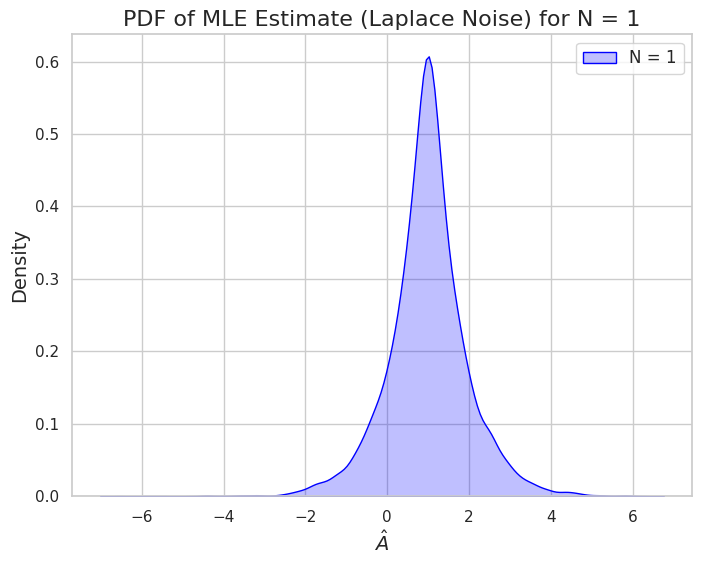

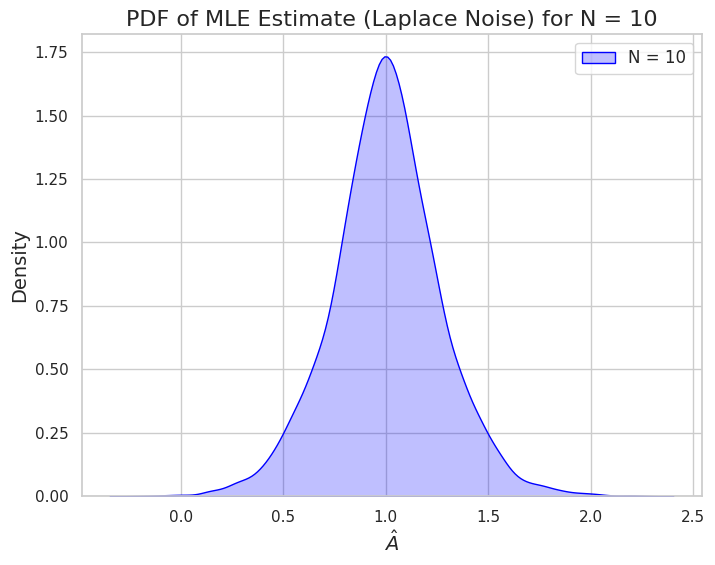

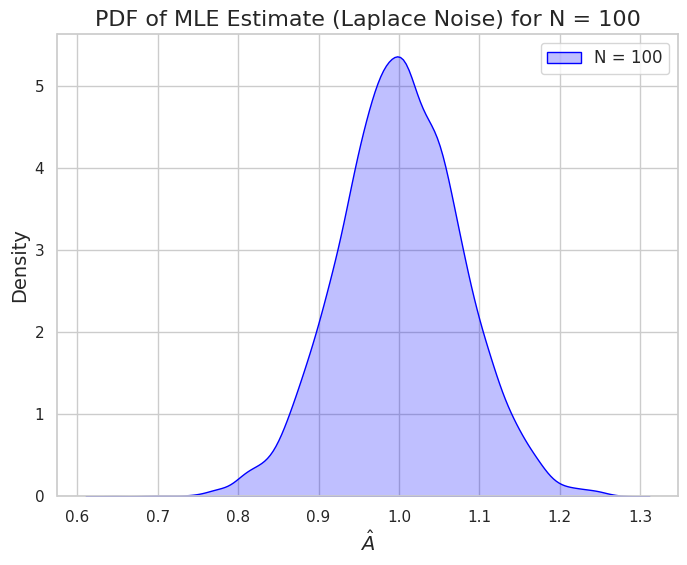

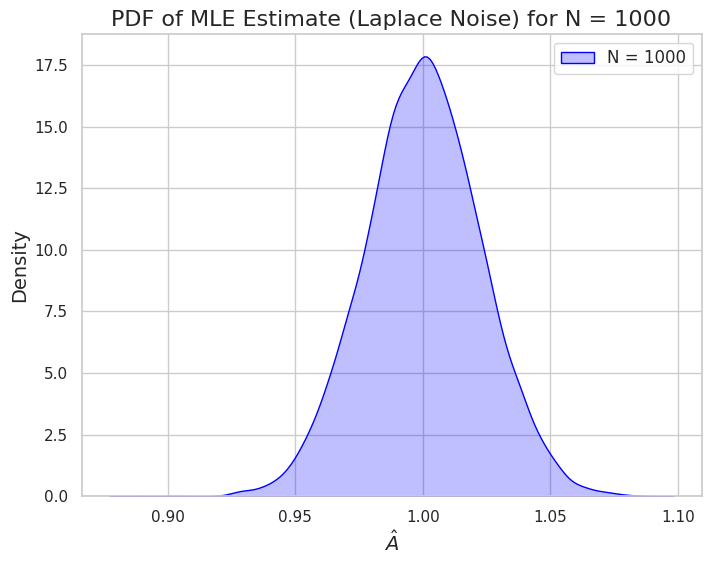

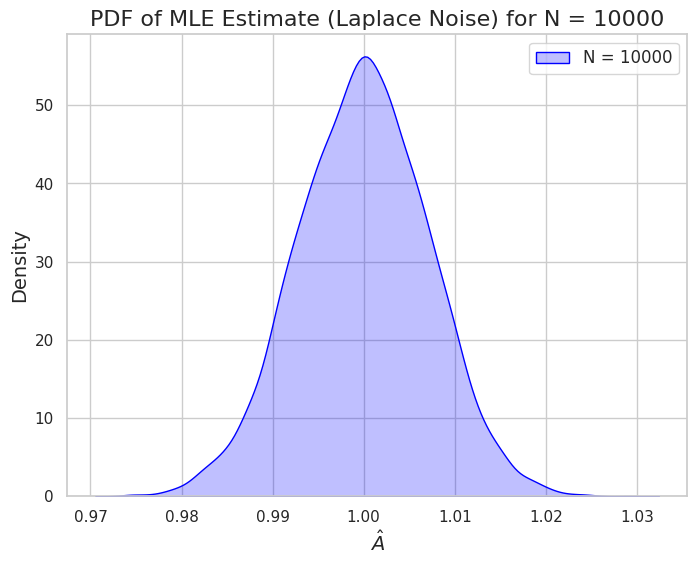

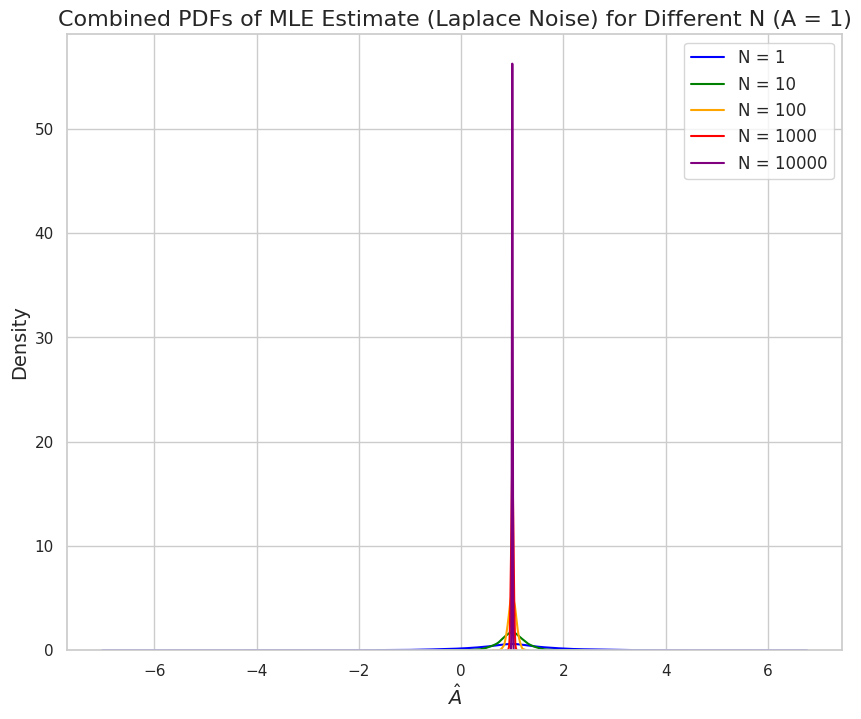

In [54]:
A_fixed = 1   # for A = 1
N_values = [1, 10, 100, 1000, 10000]


for N in N_values:
    A_hat_array = laplace_samples[(A_fixed, N)]

    plt.figure(figsize=(8,6))

    sns.kdeplot(A_hat_array, fill=True, color='blue', label=f'N = {N}')

    plt.xlabel(r'$\hat{A}$', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title(f'PDF of MLE Estimate (Laplace Noise) for N = {N}', fontsize=16)
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.show()


plt.figure(figsize=(10,8))

colors = ['blue', 'green', 'orange', 'red', 'purple']

for idx, N in enumerate(N_values):
    A_hat_array = laplace_samples[(A_fixed, N)]

    sns.kdeplot(A_hat_array, color=colors[idx], label=f'N = {N}')

plt.xlabel(r'$\hat{A}$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title(f'Combined PDFs of MLE Estimate (Laplace Noise) for Different N (A = {A_fixed})', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

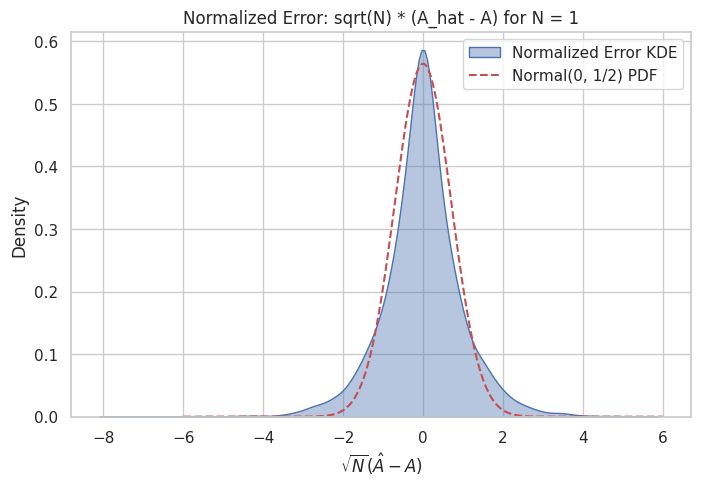

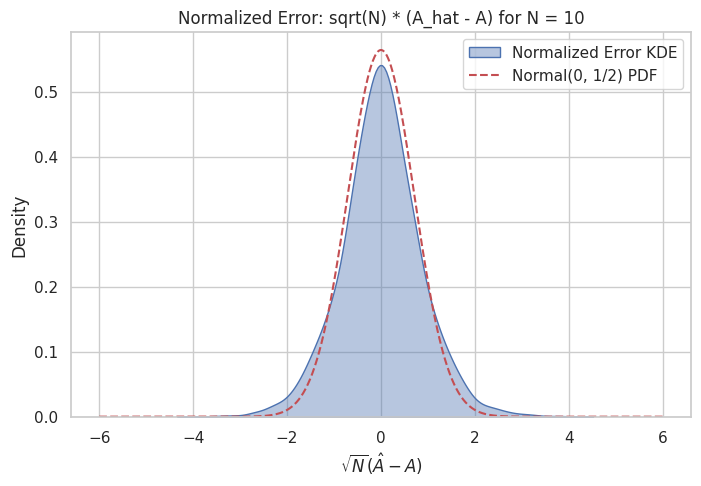

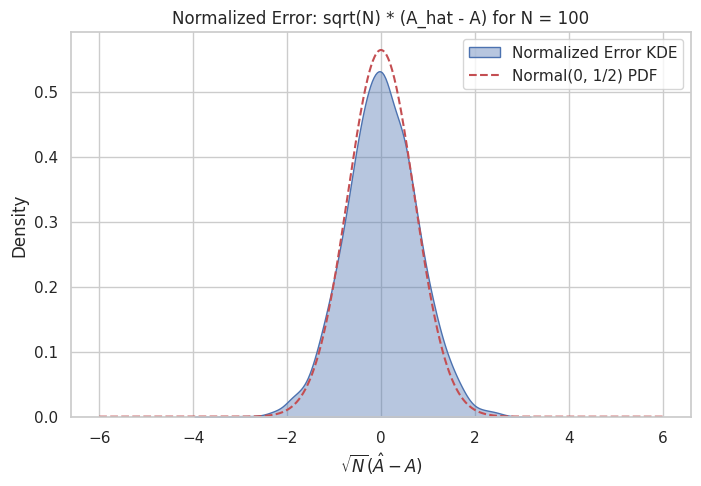

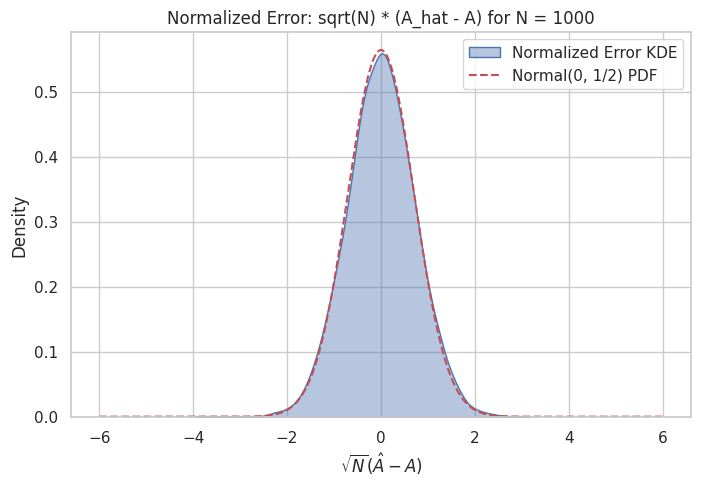

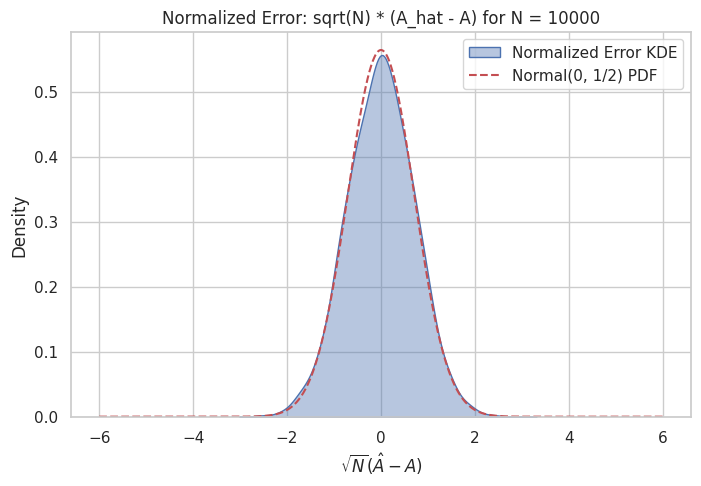

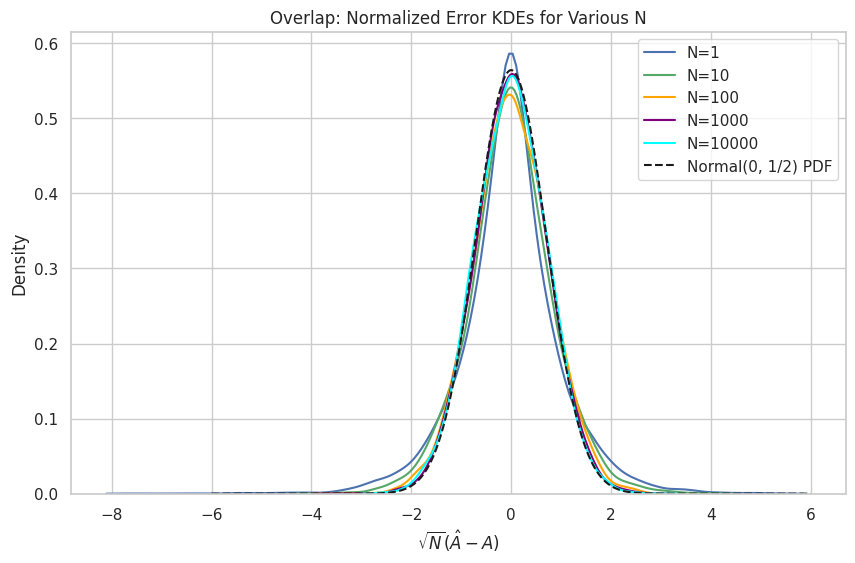

In [59]:
A = 1

fisher_info_inv = 1/2

for N in [1, 10, 100, 1000, 10000]:
    A_hat_array = laplace_samples[(A, N)]

    normalized_error = np.sqrt(N) * (A_hat_array - A)

    plt.figure(figsize=(8, 5))
    sns.kdeplot(normalized_error, bw_adjust=1.2, label="Normalized Error KDE", fill=True, alpha=0.4)

    x = np.linspace(-6, 6, 1000)
    plt.plot(x, norm.pdf(x, loc=0, scale=np.sqrt(fisher_info_inv)), 'r--', label="Normal(0, 1/2) PDF")

    plt.title(f"Normalized Error: sqrt(N) * (A_hat - A) for N = {N}")
    plt.xlabel(r"$\sqrt{N}(\hat{A} - A)$")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'orange', 'purple', 'cyan']

for idx, N in enumerate([1, 10, 100, 1000, 10000]):
    A_hat_array = laplace_samples[(A, N)]
    normalized_error = np.sqrt(N) * (A_hat_array - A)

    sns.kdeplot(normalized_error, bw_adjust=1.2, label=f"N={N}", color=colors[idx])

x = np.linspace(-6, 6, 1000)
plt.plot(x, norm.pdf(x, loc=0, scale=np.sqrt(fisher_info_inv)), 'k--', label="Normal(0, 1/2) PDF")

plt.title("Overlap: Normalized Error KDEs for Various N")
plt.xlabel(r"$\sqrt{N}(\hat{A} - A)$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()



---- Results for A = 1 ----
N =     1, E[A_hat] = -0.5297
N =    10, E[A_hat] = 1.0248
N =   100, E[A_hat] = 0.9902
N =  1000, E[A_hat] = 0.9980
N = 10000, E[A_hat] = 0.9996

---- Results for A = 10 ----
N =     1, E[A_hat] = 9.0100
N =    10, E[A_hat] = 10.0377
N =   100, E[A_hat] = 10.0089
N =  1000, E[A_hat] = 10.0004
N = 10000, E[A_hat] = 10.0002


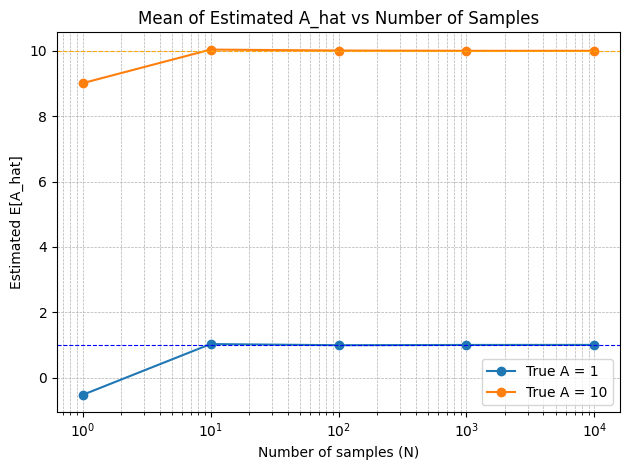

In [6]:
Cg = 1.78
gamma = np.sqrt(2 * Cg)

A_values = [1, 10]
N_values = [1, 10, 100, 1000, 10000]
num_trials = 1000
def nll(A, x, gamma):
    return np.sum(np.log(gamma**2 + (x - A)**2))

def grad_nll(A, x, gamma):
    return np.sum(2 * (A - x) / (gamma**2 + (x - A)**2))

def mle_scipy(x, gamma):
    initial_guess = np.median(x)
    result = minimize(
        fun=nll,
        x0=[initial_guess],
        args=(x, gamma),
        method='BFGS',
        jac=grad_nll,
        options={'gtol': 1e-6, 'maxiter': 100}
    )
    return result.x[0]

for A_true in A_values:
    print(f"\n---- Results for A = {A_true} ----")
    results = []
    for N in N_values:
        A_hats = []
        for _ in range(num_trials):
            noise = np.random.standard_cauchy(size=N) * gamma  # Cauchy(0, gamma)
            x = A_true + noise
            A_hat = mle_scipy(x, gamma)
            A_hats.append(A_hat)
        mean_A_hat = np.mean(A_hats)
        results.append((N, mean_A_hat))
        print(f"N = {N:5d}, E[A_hat] = {mean_A_hat:.4f}")

    N_list, mean_list = zip(*results)
    plt.plot(N_list, mean_list, marker='o', label=f'True A = {A_true}')

plt.xscale('log')
plt.xlabel('Number of samples (N)')
plt.ylabel('Estimated E[A_hat]')
plt.title('Mean of Estimated A_hat vs Number of Samples')
plt.axhline(y=1, color='blue', linestyle='--', linewidth=0.8)
plt.axhline(y=10, color='orange', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Variance of A_hat:
       N |     Var(A=1) |    Var(A=10)
------------------------------------
       1 |   4223.19994 |    514.13213
      10 |      0.97119 |      0.97795
     100 |      0.07414 |      0.07195
    1000 |      0.00707 |      0.00710
   10000 |      0.00068 |      0.00072


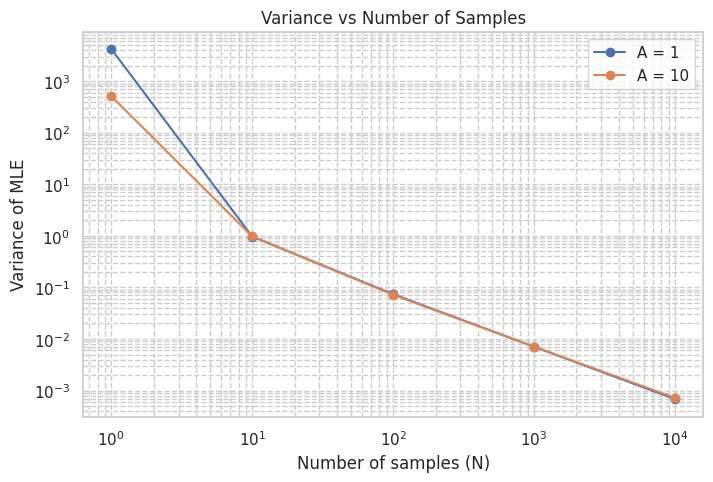

In [63]:
Cg = 1.78
gamma = np.sqrt(2 * Cg)
n_trials = 1000
N_list = [1, 10, 100, 1000, 10000]
A_values = [1, 10]

def nll(A, x, gamma):
    return np.sum(np.log(gamma**2 + (x - A)**2))

def grad_nll(A, x, gamma):
    return np.sum(2 * (A - x) / (gamma**2 + (x - A)**2))

def estimate_mle(x, gamma):
    initial_guess = np.median(x)
    result = minimize(
        fun=nll,
        x0=[initial_guess],
        args=(x, gamma),
        method='BFGS',
        jac=grad_nll,
        options={'gtol': 1e-6, 'maxiter': 100}
    )
    return result.x[0]

results = {A: [] for A in A_values}

all_estimates = {A: {} for A in A_values}

for A in A_values:
    for N in N_list:
        estimates = []
        for _ in range(n_trials):
            noise = cauchy(loc=0, scale=gamma).rvs(size=N)
            x = A + noise
            A_hat = estimate_mle(x, gamma)
            estimates.append(A_hat)
        estimates = np.array(estimates)
        var_A_hat = np.var(estimates)
        results[A].append(var_A_hat)
        all_estimates[A][N] = estimates   # <--- Save the full list here
        # print(f"N = {N}, Var(A_hat) = {var_A_hat:.5f}")

print("\nVariance of A_hat:")
print(f"{'N':>8} | {'Var(A=1)':>12} | {'Var(A=10)':>12}")
print("-"*36)
for i, N in enumerate(N_list):
    print(f"{N:8} | {results[1][i]:12.5f} | {results[10][i]:12.5f}")

plt.figure(figsize=(8,5))
for A in A_values:
    plt.plot(N_list, results[A], marker='o', label=f'A = {A}')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of samples (N)')
plt.ylabel('Variance of MLE')
plt.title('Variance vs Number of Samples')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

Done for N = 1
Done for N = 10
Done for N = 100
Done for N = 1000
Done for N = 10000


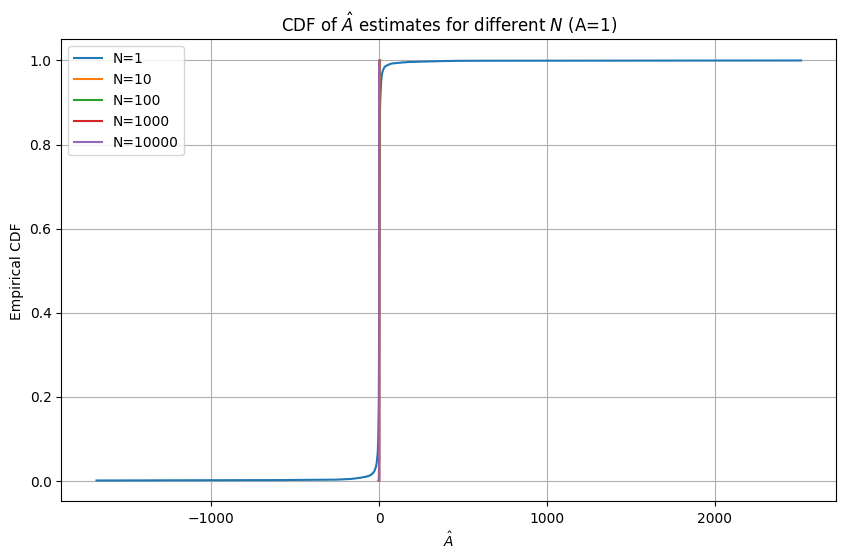

In [9]:
Cg = 1.78
gamma = np.sqrt(2 * Cg)

A = 1
N_values = [1, 10, 100, 1000, 10000]
num_trials = 5000

def nll(A_hat, x, gamma):
    return np.sum(np.log(gamma**2 + (x - A_hat)**2))

def grad_nll(A_hat, x, gamma):
    return np.sum(2 * (A_hat - x) / (gamma**2 + (x - A_hat)**2))

def mle_scipy(x, gamma):
    initial_guess = np.median(x)
    result = minimize(
        fun=nll,
        x0=[initial_guess],
        args=(x, gamma),
        method='BFGS',
        jac=grad_nll,
        options={'gtol': 1e-6, 'maxiter': 100}
    )
    return result.x[0]

all_A_hats = {}

for N in N_values:
    A_hats = []
    for _ in range(num_trials):
        noise = np.random.standard_cauchy(size=N) * gamma
        x = A + noise
        A_hat = mle_scipy(x, gamma)
        A_hats.append(A_hat)
    all_A_hats[N] = np.array(A_hats)
    print(f"Done for N = {N}")

plt.figure(figsize=(10, 6))

for N in N_values:
    ecdf = ECDF(all_A_hats[N])
    plt.plot(ecdf.x, ecdf.y, label=f'N={N}')

plt.xlabel(r'$\hat{A}$')
plt.ylabel('Empirical CDF')
plt.title(r'CDF of $\hat{A}$ estimates for different $N$ (A=1)')
plt.legend()
plt.grid(True)
plt.show()

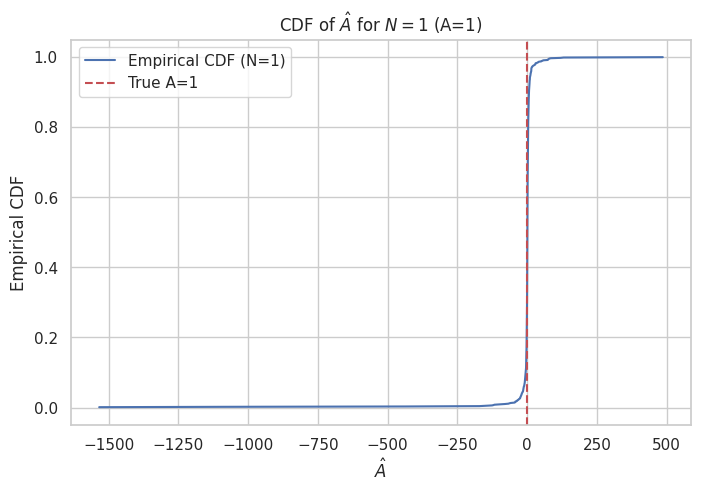

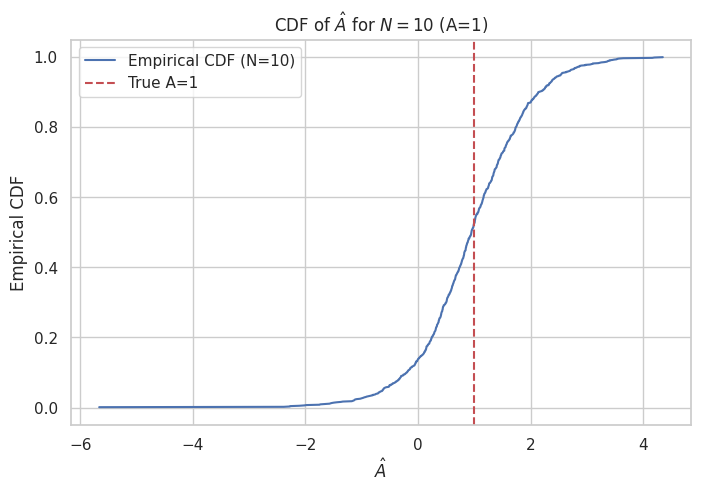

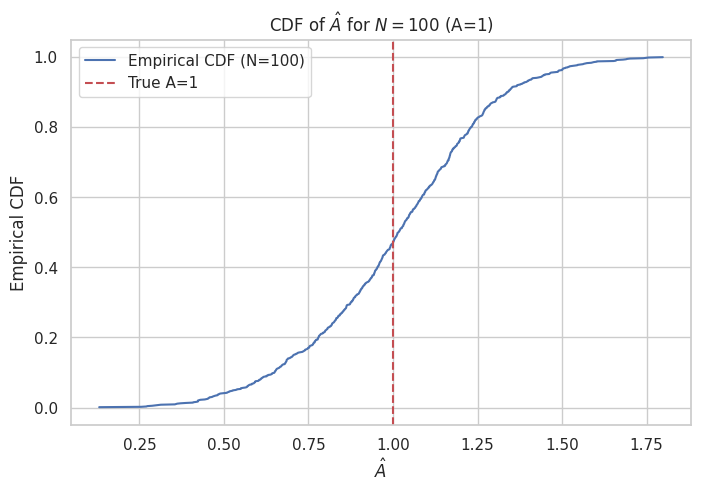

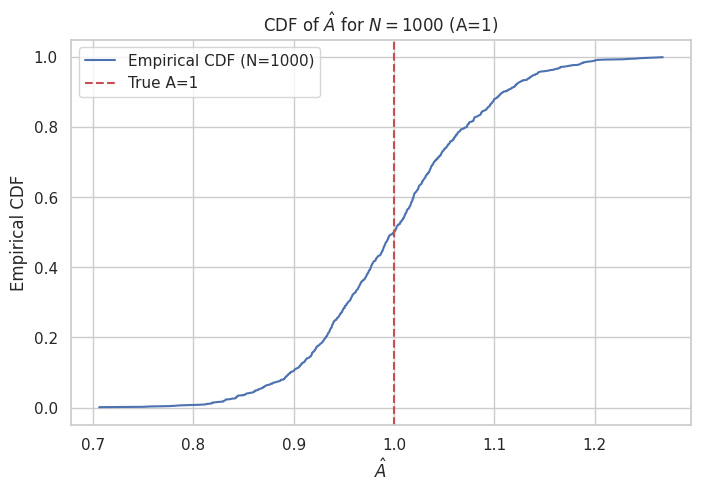

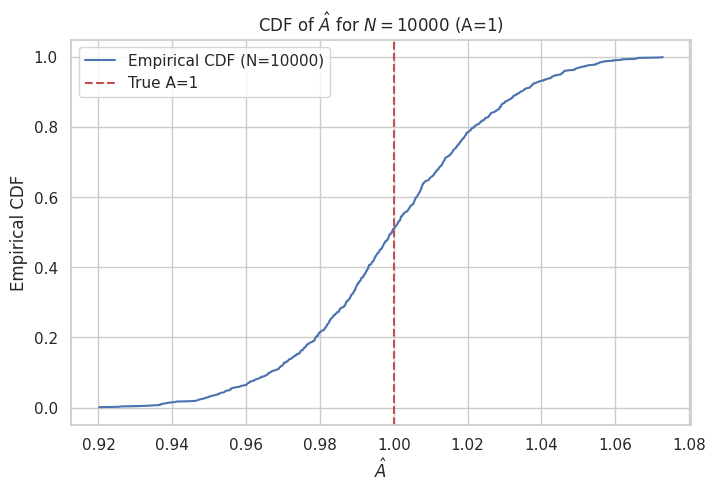

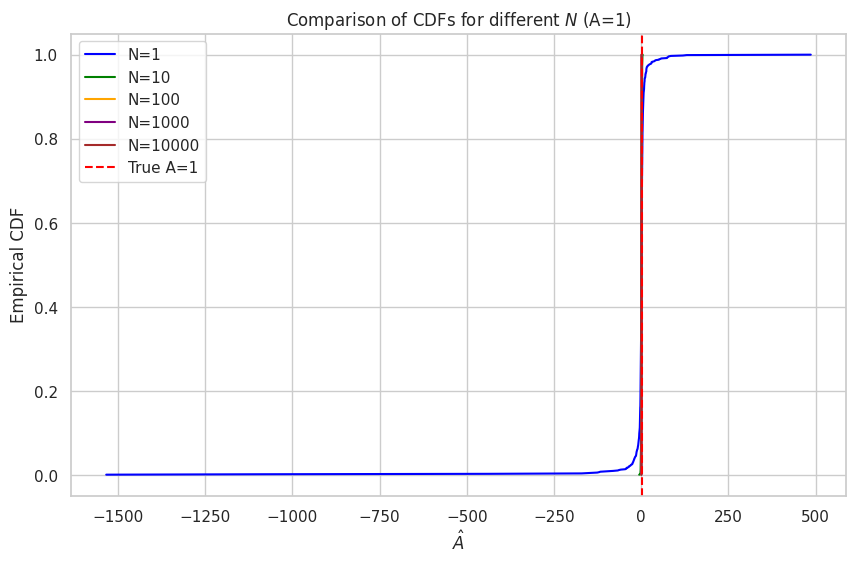

In [64]:
A_to_plot = 1
N_values = [1, 10, 100, 1000, 10000]

for N in N_values:
    estimates = all_estimates[A_to_plot][N]
    plt.figure(figsize=(8, 5))
    ecdf = ECDF(estimates)
    plt.plot(ecdf.x, ecdf.y, label=f'Empirical CDF (N={N})')
    plt.axvline(x=A_to_plot, color='r', linestyle='--', label=f'True A={A_to_plot}')
    plt.xlabel(r'$\hat{A}$')
    plt.ylabel('Empirical CDF')
    plt.title(rf'CDF of $\hat{{A}}$ for $N={N}$ (A={A_to_plot})')
    plt.legend()
    plt.grid(True)
    plt.show()

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'purple', 'brown']

for i, N in enumerate(N_values):
    estimates = all_estimates[A_to_plot][N]
    ecdf = ECDF(estimates)
    plt.plot(ecdf.x, ecdf.y, label=f'N={N}', color=colors[i])

plt.axvline(x=A_to_plot, color='red', linestyle='--', label=f'True A={A_to_plot}')
plt.xlabel(r'$\hat{A}$')
plt.ylabel('Empirical CDF')
plt.title(rf'Comparison of CDFs for different $N$ (A={A_to_plot})')
plt.legend()
plt.grid(True)
plt.show()

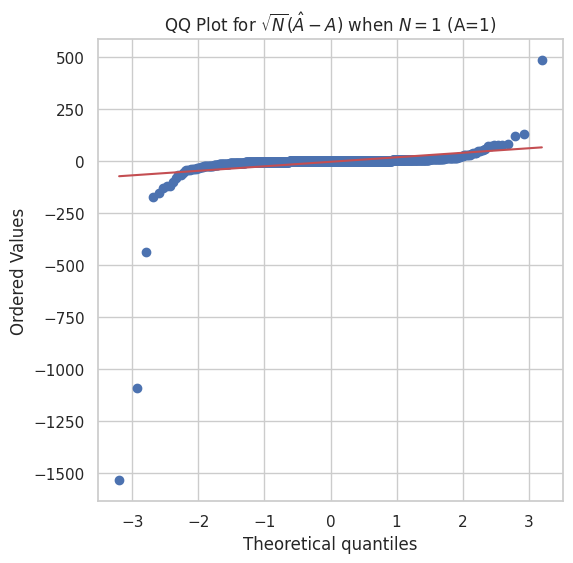

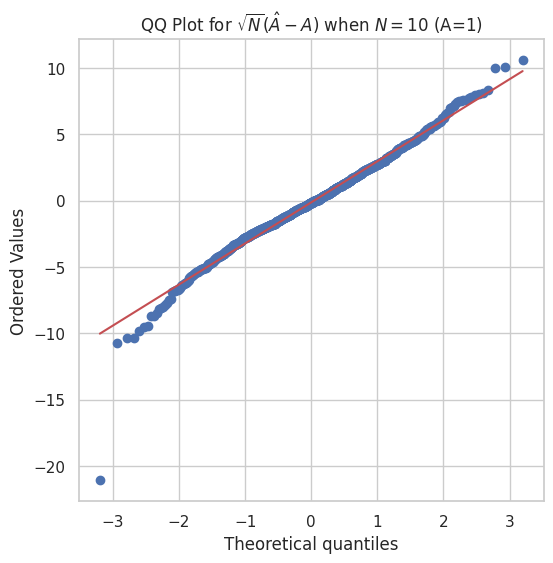

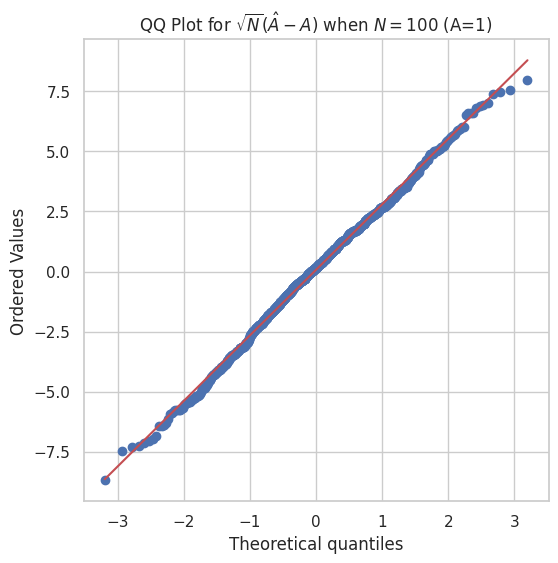

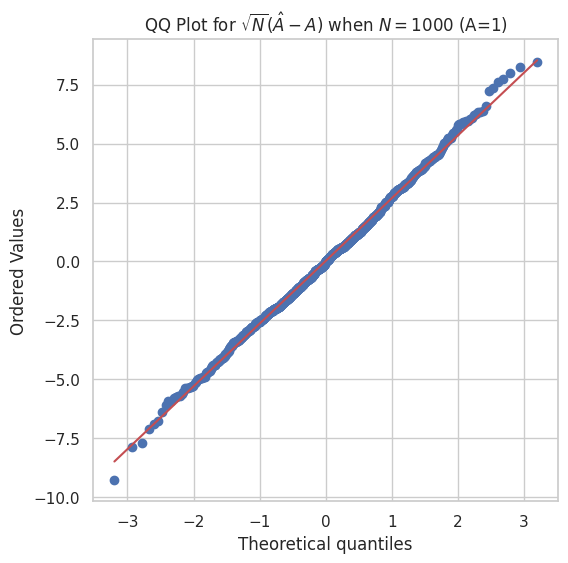

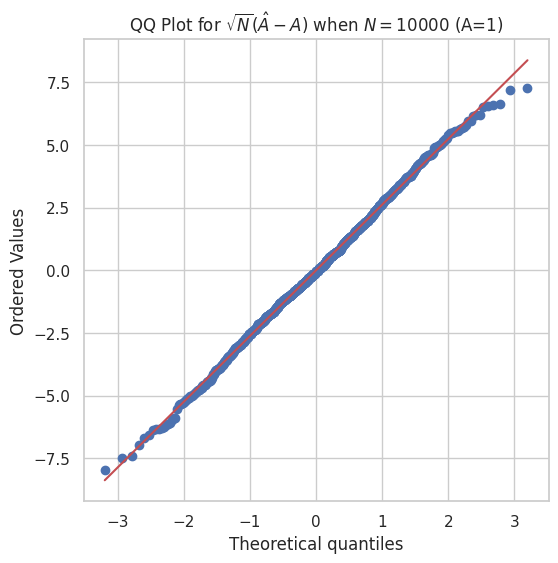

In [65]:
A_to_plot = 1  # For A = 1
N_values = [1, 10, 100, 1000, 10000]

for N in N_values:
    estimates = all_estimates[A_to_plot][N]
    standardized = np.sqrt(N) * (estimates - A_to_plot)

    plt.figure(figsize=(6,6))
    stats.probplot(standardized, dist="norm", plot=plt)
    plt.title(rf'QQ Plot for $\sqrt{{N}}(\hat{{A}} - A)$ when $N={N}$ (A={A_to_plot})')
    plt.grid(True)
    plt.show()

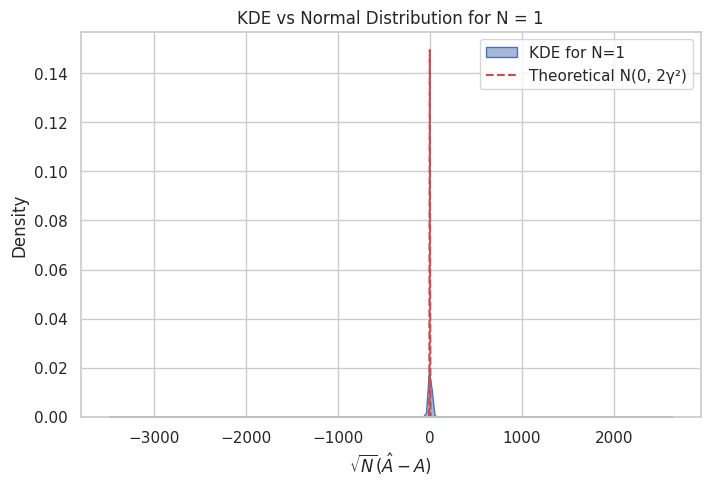

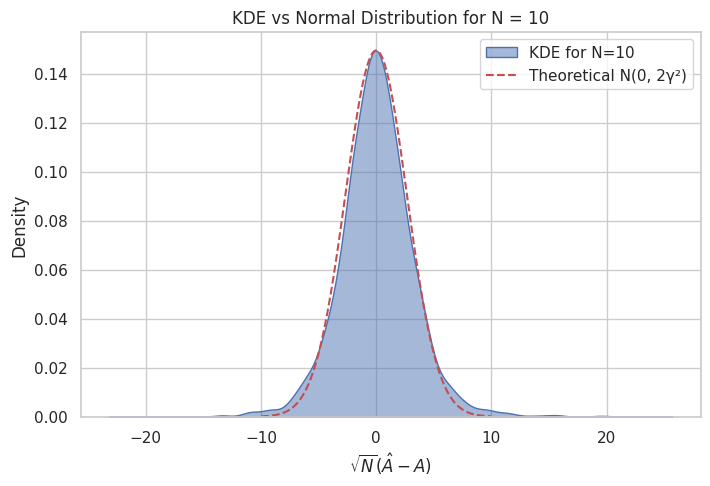

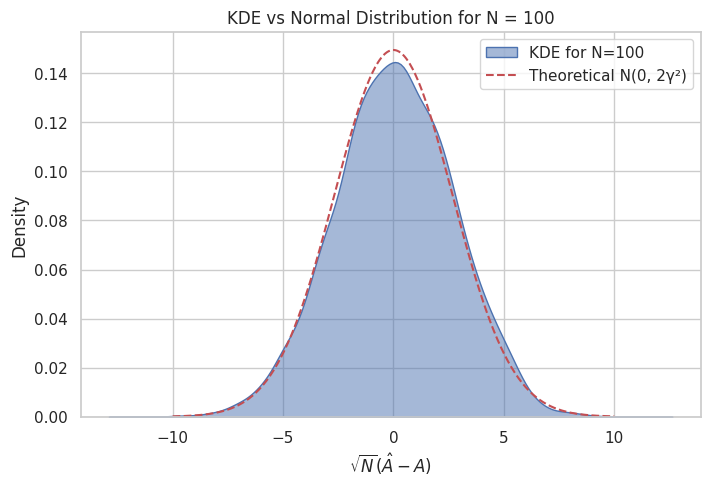

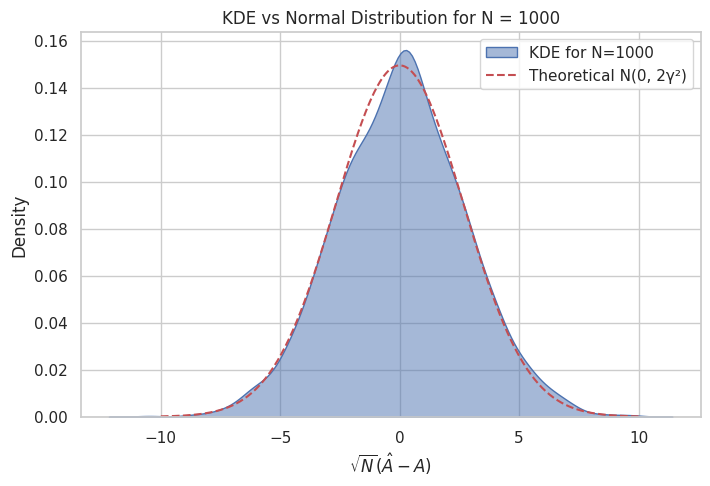

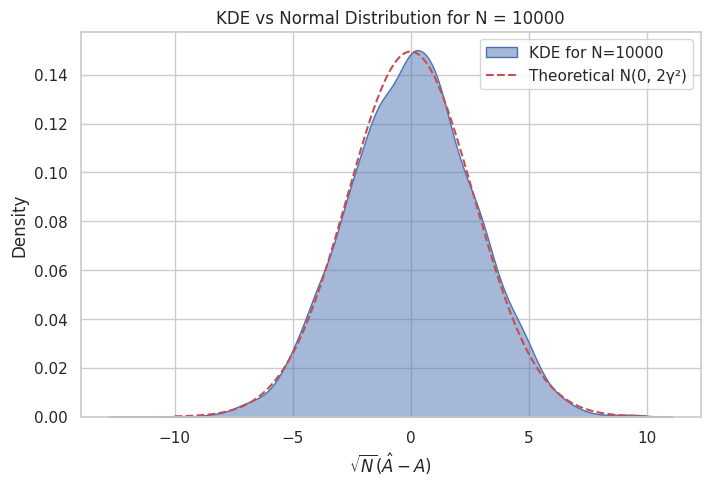

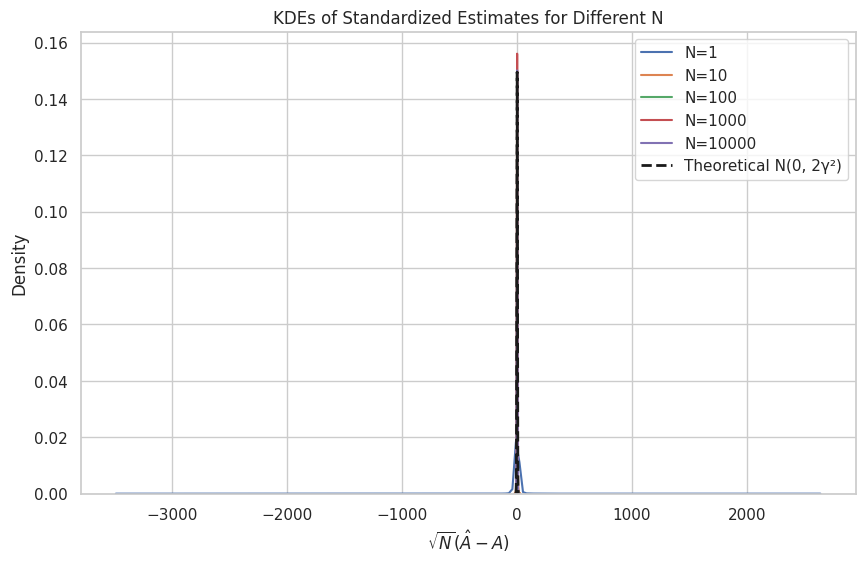

In [68]:
A = 1
Cg = 1.78
gamma = np.sqrt(2 * Cg)
fisher_info_inv = 2 * gamma**2

N_values = [1, 10, 100, 1000, 10000]

x = np.linspace(-10, 10, 500)

# --- 1. Separate plots for each N ---
for N in N_values:
    A_hats = all_A_hats[N]
    standardized = np.sqrt(N) * (A_hats - A)

    plt.figure(figsize=(8, 5))
    sns.kdeplot(standardized, fill=True, label=f'KDE for N={N}', alpha=0.5)
    plt.plot(x, norm.pdf(x, loc=0, scale=np.sqrt(fisher_info_inv)), 'r--', label='Theoretical N(0, 2γ²)')

    plt.title(f'KDE vs Normal Distribution for N = {N}')
    plt.xlabel(r'$\sqrt{N}(\hat{A} - A)$')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 2. Combined plot for all N ---
plt.figure(figsize=(10, 6))

for N in N_values:
    A_hats = all_A_hats[N]
    standardized = np.sqrt(N) * (A_hats - A)

    sns.kdeplot(standardized, label=f'N={N}', fill=False)

plt.plot(x, norm.pdf(x, loc=0, scale=np.sqrt(fisher_info_inv)), 'k--', label='Theoretical N(0, 2γ²)', linewidth=2)

plt.title('KDEs of Standardized Estimates for Different N')
plt.xlabel(r'$\sqrt{N}(\hat{A} - A)$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

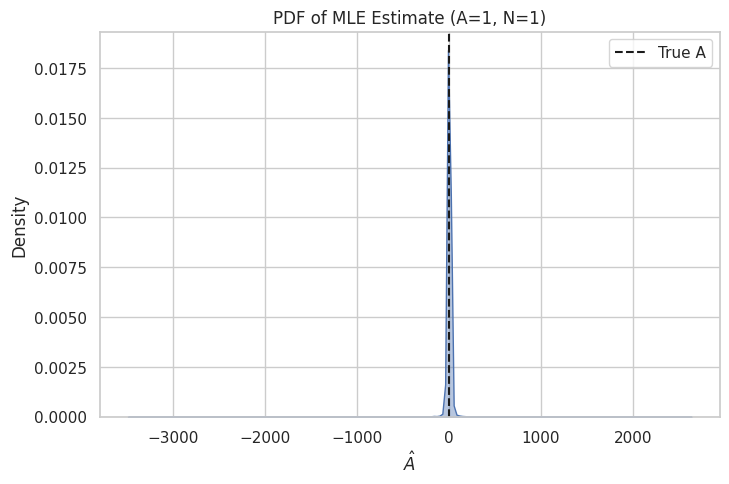

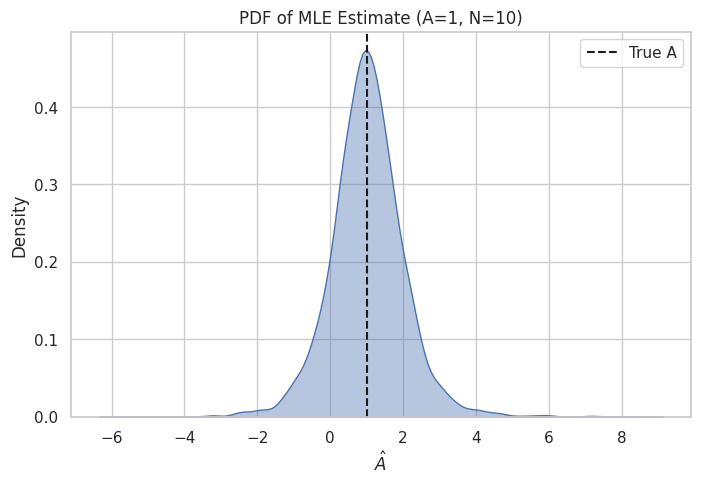

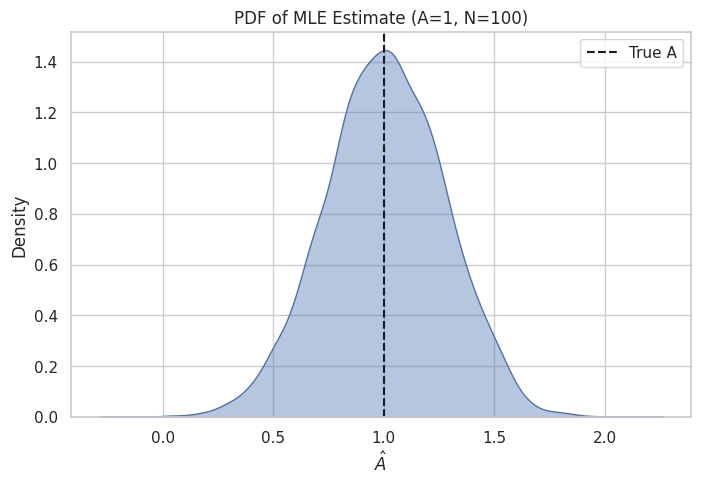

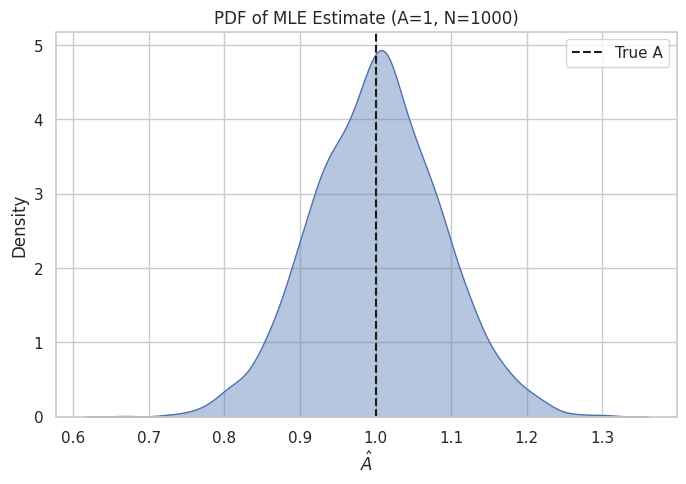

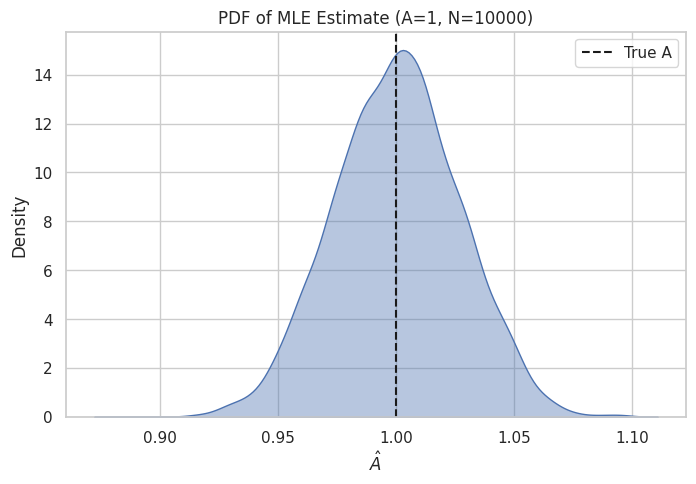

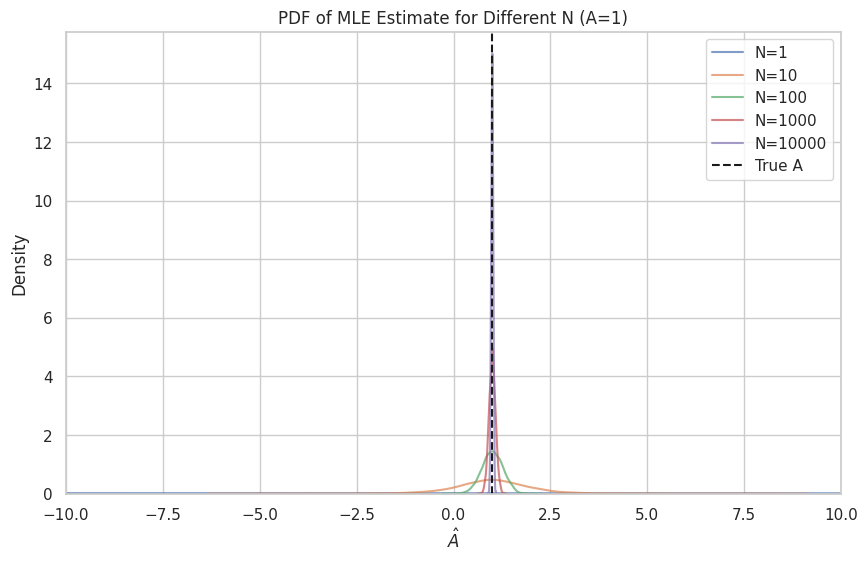

In [ ]:
A = 1
N_values = [1, 10, 100, 1000, 10000]

for N in N_values:
    A_hats = all_A_hats[N]

    plt.figure(figsize=(8, 5))
    sns.kdeplot(A_hats, fill=True, alpha=0.4)
    plt.axvline(x=A, color='k', linestyle='--', label='True A')
    plt.xlabel(r'$\hat{A}$')
    plt.ylabel('Density')
    plt.title(f'PDF of MLE Estimate (A=1, N={N})')
    plt.legend()
    plt.grid(True)
    # plt.xlim([-5, 7])
    plt.show()

plt.figure(figsize=(10, 6))

for N in N_values:
    A_hats = all_A_hats[N]
    sns.kdeplot(A_hats, label=f'N={N}', fill=False, alpha=0.7)

plt.axvline(x=A, color='k', linestyle='--', label='True A')

plt.xlabel(r'$\hat{A}$')
plt.ylabel('Density')
plt.title('PDF of MLE Estimate for Different N (A=1)')
plt.legend()
plt.grid(True)
plt.xlim([-10, 10])
plt.show()